In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import time

In [2]:
#index = range(0, 57)    # cosi la prima riga è l'indice delle colonne
spam_data = pd.read_csv('spam_tfidf.csv', index_col=[0])

spam_data.head()

,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,targhet
0,0.000000,1.04567,0.570084,0.0,0.309696,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.553776,0.000000,0.00000,1
1,0.309672,0.45748,0.445378,0.0,0.135492,0.427637,0.365548,0.120390,0.000000,1.186630,...,0.000000,0.0,0.0,0.00000,0.069628,0.0,0.264787,0.214164,0.08707,1
2,0.088478,0.00000,0.632436,0.0,1.190396,0.290182,0.330734,0.206383,1.141600,0.315593,...,0.131159,0.0,0.0,0.01762,0.075430,0.0,0.196455,0.218923,0.01814,1
3,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,0.795294,...,0.000000,0.0,0.0,0.00000,0.072265,0.0,0.097516,0.000000,0.00000,1
4,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,0.795294,...,0.000000,0.0,0.0,0.00000,0.071210,0.0,0.096092,0.000000,0.00000,1


In [3]:
X = spam_data.drop('targhet', axis=1)
y = spam_data['targhet']  # colonna che segna se è spam o meno
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [4]:
KNN = KNeighborsClassifier(n_neighbors=5)
start_time=time.time()
KNN.fit(X_train, y_train)
print('Training time: %f'%(time.time() - start_time))
KNN.score(X_test, y_test)

Training time: 0.009024


0.9370249728555917

In [5]:
start_time=time.time()
y_predict = KNN.predict(X_test)
print('Prediction time: %f'%(time.time() - start_time))
print('Missclassified examples: %d'% (y_test != y_predict).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))

Prediction time: 0.151961
Missclassified examples: 58
Accuracy: 0.937


Text(33.22222222222222, 0.5, 'Truth')

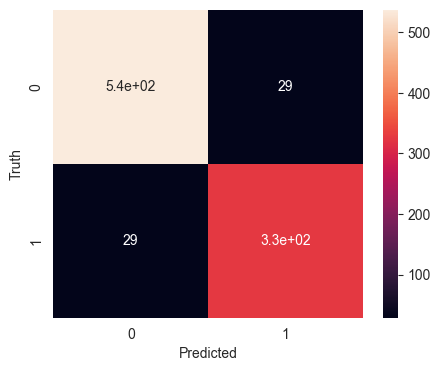

In [6]:
cm = confusion_matrix(y_test, y_predict)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')